## 2.1 影像量化    

### 二值化黑白影像

#### 使用方式：   
<font color="Green">ret, output = cv2.THRESH_BINARY(img, thresh, maxval, type)     
ret 是否成功轉換，成功 True，失敗 False     
img 來源影像     
thresh 閾值，通常設定 127     
maxval 最大灰度，通常設定 255     
type 轉換方式     

https://shengyu7697.github.io/python-opencv-threshold/  
    
https://steam.oxxostudio.tw/category/python/ai/opencv-threshold.html


<table>
  <tbody>
    <tr>
      <td>轉換方式</td>
      <td>使用127, 255說明</td>
    </tr>
    <tr>
      <td>cv2.THRESH_BINARY</td>
      <td>如果大於 127 就等於 255，反之等於 0。</td>
    </tr>
    <tr>
      <td>cv2.THRESH_BINARY_INV</td>
      <td>如果大於 127 就等於 0，反之等於 255。</td>
    </tr>  
    <tr>
      <td>cv2.THRESH_TRUNC</td>
      <td>如果大於 127 就等於 127，反之數值不變。</td>
    </tr> 
    <tr>
      <td>cv2.THRESH_TOZERO</td>
      <td>如果大於 127 數值不變，反之數值等於 0。</td>
    </tr> 
    <tr>
      <td>cv2.THRESH_TOZERO_INV</td>
      <td>如果大於 127 等於 0，反之數值不變。</td>
    </tr>       
  </tbody>
</table>

### <font color="Magenta"> 練習調整 127, 255，觀看結果

3


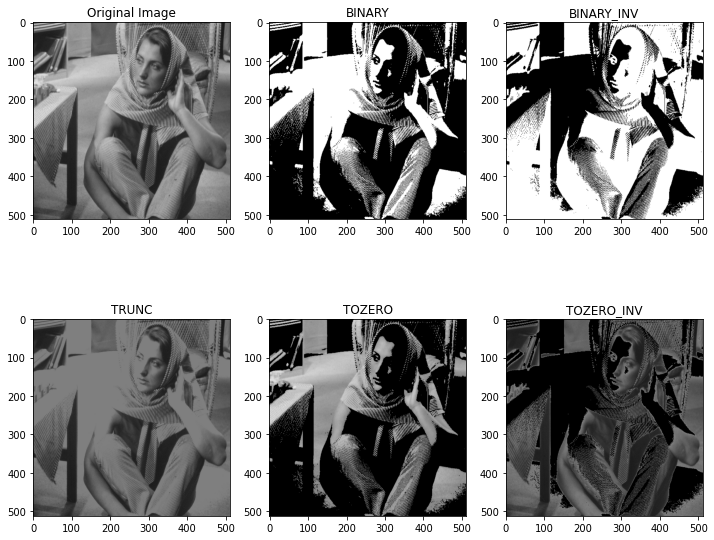

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

thresh = 127
maxval = 255

img = cv2.imread('Barbara.bmp')
print(img.ndim)
ret, th1 = cv2.threshold(img, thresh, maxval, cv2.THRESH_BINARY)
ret, th2 = cv2.threshold(img, thresh, maxval, cv2.THRESH_BINARY_INV)
ret, th3 = cv2.threshold(img, thresh, maxval, cv2.THRESH_TRUNC)
ret, th4 = cv2.threshold(img, thresh, maxval, cv2.THRESH_TOZERO)
ret, th5 = cv2.threshold(img, thresh, maxval, cv2.THRESH_TOZERO_INV)

titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, th1, th2, th3, th4, th5]

plt.figure(figsize=(12, 10))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
#    plt.xticks([]), plt.yticks([])
plt.show()

## 2.2 adaptiveThreshold() 自適應二值化    

#### 使用方式：   
<font color="Green"> cv2.adaptiveThreshold(img, maxValue, adaptiveMethod, thresholdType, blockSize, C)   
img 來源影像(二維灰階影像，非三維彩色影像)   
maxValue 最大灰度，通常設定 255   
adaptiveMethod 自適應二值化計算方法   
thresholdType 二值化轉換方式   
blockSize 轉換區域大小，通常設定 11   
C 偏移量，通常設定 2   
    
https://shengyu7697.github.io/python-opencv-threshold/    
    
https://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html?highlight=cv2.threshold#cv2.adaptiveThreshold    

2


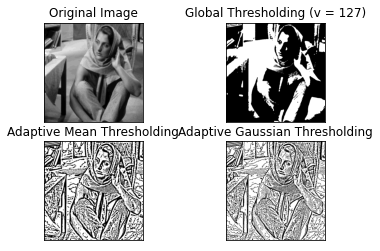

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread( "Barbara.bmp", -1 )
img = cv2.medianBlur(img, 5)

print(img.ndim)

ret, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2, 2, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

## <font color="Red"> 2.3 二值化彩色影像
<font color="Red">  設計一個函數 def imgBinQuan(img)，呼叫時輸入 img ，傳回『二值化彩色影像』結果。   
影像的像素小於128，都改成0       
影像的像素大於127，都改成255       
https://iter01.com/561616.html  

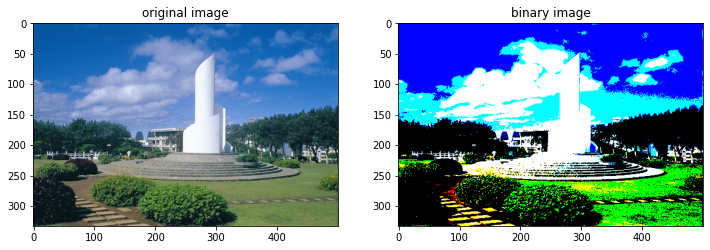

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def imgBinQuan(img):
    # 獲取影像的高度和寬度
    nr,nc = img.shape[:2]
    # 建立一幅影像，內容使用零填充
    new_img = np.zeros((nr, nc, 3), np.uint8)
    for i in range(nr):
        for j in range(nc):
            for k in range(3):  # 對應RGB三通道
#------------------- Code Here -------------------#     
                if(img[i][j][k]<128):
                    new_img[i][j][k] = 0;
                else:
                    new_img[i][j][k] = 255;
#------------------- Code Here -------------------#                    
    return new_img 
    

imgBGR = cv2.imread('Commons.jpeg')
imgRGB = imgBGR[:,:,::-1]

binImg = imgBinQuan(imgRGB)

# 顯示影像
plt.figure(figsize=(12, 10))
plt.subplot(1,2,1)   
plt.title('original image') 
plt.imshow(imgRGB)
plt.subplot(1,2,2)   
plt.title('binary image') 
plt.imshow(binImg)

## <font color="Red"> 2.3.a 方法2   
將上述的for迴圈，改成使用 cv2.threshold

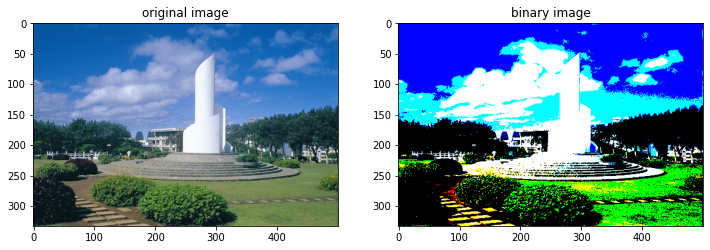

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def imgBinQuan(img):
    # 獲取影像的高度和寬度
    nr,nc = img.shape[:2]
    # 建立一幅影像，內容使用零填充
    new_img = np.zeros((nr, nc, 3), np.uint8)
#------------------- Code Here -------------------#    
    for i in range(3):
        ret, new_img[:,:,i] = cv2.threshold(img[:,:,i], thresh, maxval, cv2.THRESH_BINARY)
        
#------------------- Stop Here -------------------#   
    return new_img 

imgBGR = cv2.imread('Commons.jpeg')
imgRGB = imgBGR[:,:,::-1]

binImg = imgBinQuan(imgRGB)

# 顯示影像
plt.figure(figsize=(12, 10))
plt.subplot(1,2,1)   
plt.title('original image') 
plt.imshow(imgRGB)
plt.subplot(1,2,2)   
plt.title('binary image') 
plt.imshow(binImg)

## <font color="Red"> 2.3.b 方法3   
將上述的for迴圈，改成使用 cv2.adaptiveThreshold

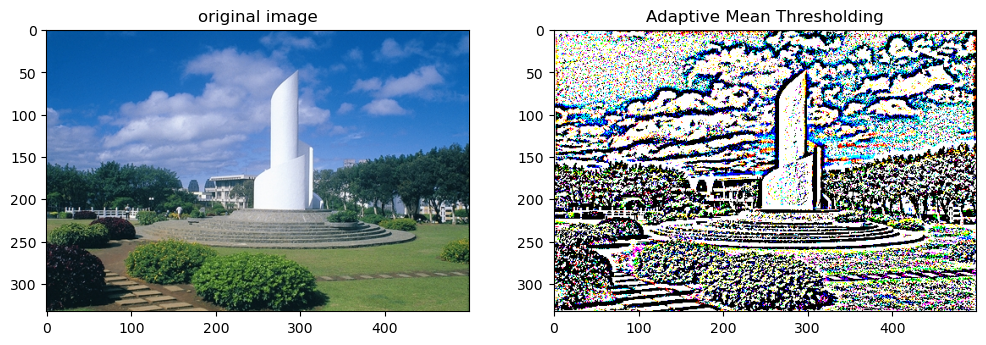

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def imgBinQuan(img):
    # 獲取影像的高度和寬度
    nr,nc = img.shape[:2]
    # 建立一幅影像，內容使用零填充
    new_img = np.zeros((nr, nc, 3), np.uint8)
#------------------- Code Here -------------------#           
for i in range(3):
        new_img[:,:,i] = cv2.adaptiveThreshold(img[:,:,i], 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
#------------------- Stop Here -------------------#   
    return new_img 

imgBGR = cv2.imread('Commons.jpeg')
imgRGB = imgBGR[:,:,::-1]

binImg = imgBinQuan(imgRGB)

# 顯示影像
plt.figure(figsize=(12, 10))
plt.subplot(1,2,1)   
plt.title('original image') 
plt.imshow(imgRGB)
plt.subplot(1,2,2)   
plt.title('Adaptive Mean Thresholding') 
plt.imshow(binImg)


##  <font color="Red"> 2.4 Complement (灰色負片)
影像 𝑓(𝑥,𝑦) 的負片計算(Complement)     
𝑐(𝑥,𝑦) = 255 − 𝑓(𝑥,𝑦)     
兩張影像 𝑓(𝑥,𝑦) 與 g(𝑥,𝑦) 的聯集計算(Union)     
𝑓 ∪ 𝑔 = {max⁡(𝑎,𝑏) | 𝑎∈𝑓, 𝑏∈𝑔}     
    
#### <font color="Red">1. 請設計一個函式image_complement，計算一張灰色影像的負片並傳回結果
#### <font color="Red">(請分別練習255-f與迴圈計算方式)     
#### <font color="Red">2. 請設計一個函式image_union，計算一張灰色影像的聯集並傳回結果
#### <font color="Red">(請練習迴圈計算方式)        
<img src="IP2_1.png" width="800px">    

<Figure size 1152x864 with 0 Axes>

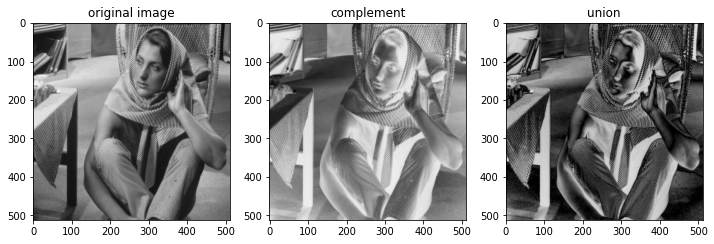

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def image_complement( f ):
    nr, nc = f.shape[:2]
    imgComplemet = np.zeros( [ nr, nc ], dtype = 'uint8' )
#------------------- Code Here -------------------#         
    for i in range(nr):
        for j in range(nc):
            imgComplemet[i, j] = 255 - f[i, j]
#------------------- Stop Here -------------------#                 
    return imgComplemet

def image_union( f, g ):
    nr, nc = f.shape[:2]
    u = np.zeros( [ nr, nc ], dtype = 'uint8' )
#------------------- Code Here -------------------#      
    for i in range(nr):
        for j in range(nc):
            u[i, j] = max(f[i, j], g[i, j])
#------------------- Stop Here -------------------#                 
    return u


img1 = cv2.imread( "Barbara.bmp", -1 )
img2 = image_complement( img1 )
img3 = image_union( img1, img2 )

plt.figure(figsize=(16, 12))    
titles = ['original image', 'complement', 'union']
images = [img1, img2, img3]

plt.figure(figsize=(12, 10))
for i in range(3):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i],cmap=plt.cm.gray)
    plt.title(titles[i])
plt.show()

##  <font color="Red"> 2.5 Complement (彩色負片)
影像 𝑓(𝑥,𝑦,z) 的負片計算(Complement)     
𝑐(𝑥,𝑦,z) = 255 − 𝑓(𝑥,𝑦,z)     
兩張影像 𝑓(𝑥,𝑦,z) 與 g(𝑥,𝑦,z) 的聯集計算(Union)     
𝑓 ∪ 𝑔 = {max⁡(𝑎,𝑏) | 𝑎∈𝑓, 𝑏∈𝑔}     
    
#### <font color="Red">1. 請設計一個函式image_complement，計算一張彩色影像的負片並傳回結果     
#### <font color="Red">2. 請設計一個函式image_union，計算一張彩色影像的聯集並傳回結果   
<img src="IP2_2.png" width="800px">  

<Figure size 1152x864 with 0 Axes>

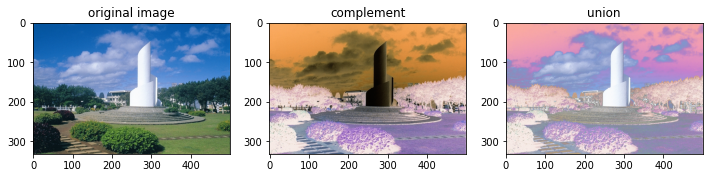

In [9]:
import numpy as np
import cv2

def image_complement( f ):
    nr, nc = f.shape[:2]
    g = np.zeros( [ nr, nc , 3], dtype = 'uint8' )
#------------------- Code Here -------------------#      
    for c in range(3):
        g[:,:,c] = 255 - f[:,:,c]
#------------------- Stop Here -------------------#      
    return g

def image_union( f, g ):
    nr, nc = f.shape[:2]
    u = np.zeros( [ nr, nc ,3], dtype = 'uint8' )
#------------------- Code Here -------------------#      
    for c in range(3):
        u[:,:,c] = np.maximum(f[:,:,c], g[:,:,c])
#------------------- Stop Here -------------------#  
    return u

imgBGR = cv2.imread( "Commons.jpeg", cv2.IMREAD_COLOR )
img1 = imgBGR[:,:,::-1]    
img2 = image_complement( img1 )
img3 = image_union( img1, img2 )
    
plt.figure(figsize=(16, 12))    
titles = ['original image', 'complement', 'union']
images = [img1, img2, img3]

plt.figure(figsize=(12, 10))
for i in range(3):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i],cmap=plt.cm.gray)
    plt.title(titles[i])
plt.show()

## 2.6 任意角度的影像旋轉(Rotation)  
理論說明：Affine Transformation(仿射轉換)       
https://silverwind1982.pixnet.net/blog/post/160691705
<img src="IP2_3.png" width="600px">  
使用方式：    
#### <font color="Magenta"> 先使用 getRotationMatrix2D() 產生旋轉指定角度影像的仿射矩陣       
cv2.getRotationMatrix2D((x, y), angle, scale)        
(x, y) 旋轉的中心點，angle 旋轉角度(-順時針，+逆時針)，scale 旋轉後的尺寸            
#### <font color="Magenta"> 再透過 warpAffine() 產生旋轉的影像       
cv2.warpAffine(img, M, (w, h))        
img 來源圖像，M 仿射矩陣，(w, h) 圖片長寬       
https://steam.oxxostudio.tw/category/python/ai/opencv-warp-affine.html

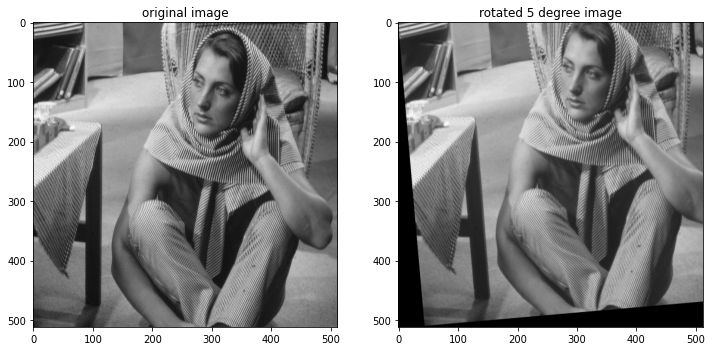

In [10]:
import numpy as np
import cv2

img = cv2.imread( "Barbara.bmp", -1 )
nr, nc = img.shape[:2]
degree = 5
center_r = 0
center_c = 0
rotation_matrix = cv2.getRotationMatrix2D( ( center_r, center_c ), degree, 1 )
imgRotate = cv2.warpAffine( img, rotation_matrix, ( nr, nc ) ) 
 
plt.figure(figsize=(12, 10))
plt.subplot(1,2,1)   
plt.title('original image') 
plt.imshow(img,cmap=plt.cm.gray)
plt.subplot(1,2,2)   
plt.title('rotated '+str(degree)+ ' degree image'  ) 
plt.imshow(imgRotate,cmap=plt.cm.gray)

## 2.6b 嘗試多種旋轉方式
1. 嘗試多種不同的旋轉角度      
2. 嘗試旋轉中心轉移到影像中心
2. 將影像改成 Commons.jpeg 

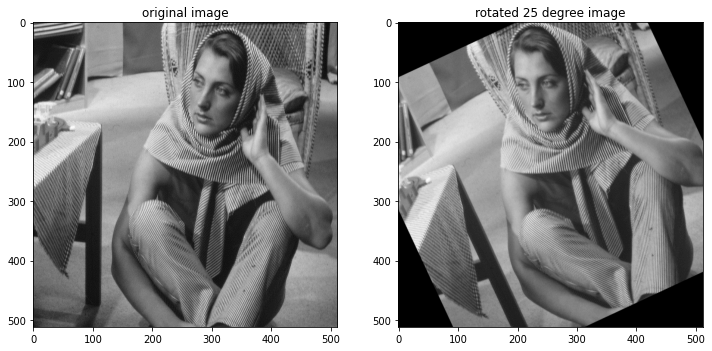

In [14]:
import numpy as np
import cv2

img = cv2.imread( "Barbara.bmp", -1 )
nr, nc = img.shape[:2]
#------------------- Code Here -------------------#   
degree = 25  # Replace with the desired rotation angle
center_r, center_c = nr // 2, nc // 2 
#------------------- Stop Here -------------------#   
rotation_matrix = cv2.getRotationMatrix2D( ( center_r, center_c ), degree, 1 )
imgRotate = cv2.warpAffine( img, rotation_matrix, ( nr, nc ) ) 
 
plt.figure(figsize=(12, 10))
plt.subplot(1,2,1)   
plt.title('original image') 
plt.imshow(img,cmap=plt.cm.gray)
plt.subplot(1,2,2)   
plt.title('rotated '+str(degree)+ ' degree image'  ) 
plt.imshow(imgRotate,cmap=plt.cm.gray)

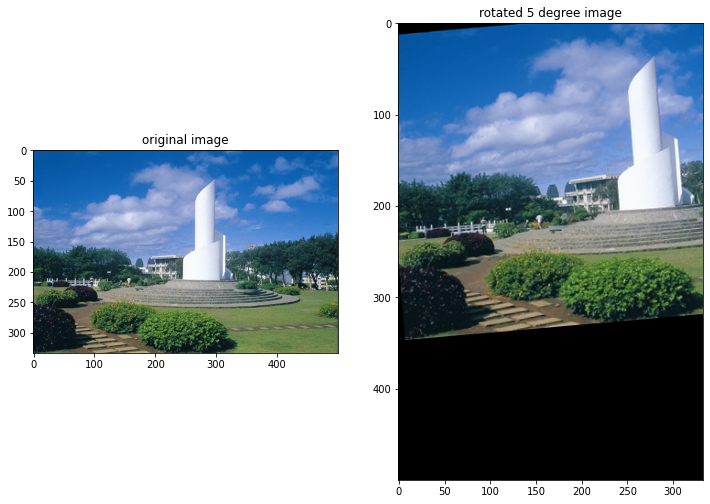

In [18]:
import numpy as np
import cv2

#------------------- Code Here -------------------#  
imgBGR = cv2.imread( "Commons.jpeg", 1 )
img = imgBGR[:,:,::-1]
nr, nc = img.shape[:2]
degree = 5  # Replace with the desired rotation angle
center_r, center_c = nr // 2, nc // 2 
#------------------- Code Here -------------------#  
rotation_matrix = cv2.getRotationMatrix2D( ( center_r, center_c ), degree, 1 )
imgRotate = cv2.warpAffine( img, rotation_matrix, ( nr, nc ) ) 
 
plt.figure(figsize=(12, 10))
plt.subplot(1,2,1)   
plt.title('original image') 
plt.imshow(img,cmap=plt.cm.gray)
plt.subplot(1,2,2)   
plt.title('rotated '+str(degree)+ ' degree image'  ) 
plt.imshow(imgRotate,cmap=plt.cm.gray)

## 2.7 透視轉換(Perspective Transform)
#### <font color="Magenta"> 仿射轉換(Affine Transformation) vs. 透視轉換(Perspective Transform)
<img src="https://www.graphicsmill.com/docs/gm/TransformationsDifference.png" width="600px">  

#### <font color="Magenta"> 先使用 getPerspectiveTransform() 產生透視矩陣     
cv2.getPerspectiveTransform(輸入影像四個點的座標，輸出影像四個點的座標)       
    
#### <font color="Magenta"> 再利用『透視矩陣』轉換成新影像     
cv2.warpPerspective(img, M, (w, h))      
img 來源圖像，M 透視矩陣，(w, h) 圖片長寬     

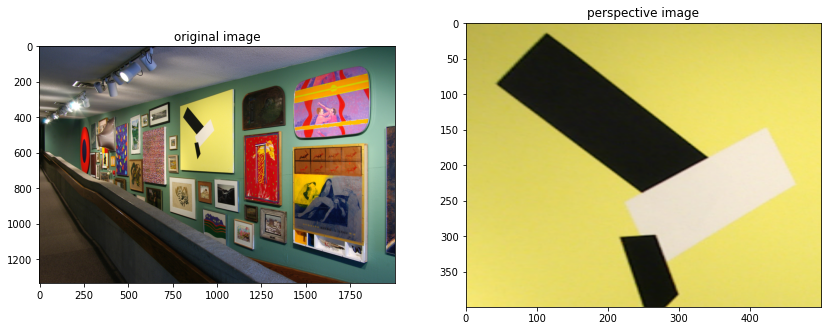

In [19]:
import numpy as np
import cv2

imgBGR = cv2.imread("Gallery.bmp", cv2.IMREAD_COLOR)
img = imgBGR[:,:,::-1]
nr, nc = img.shape[:2]
points1 = np.float32( [ [ 795, 350 ], [ 795, 690 ], [ 1090, 720 ], [ 1090, 250 ] ] )
points2 = np.float32( [ [ 0, 0 ], [ 0, 500 ], [ 650, 500 ], [ 650, 0 ] ] )

T = cv2.getPerspectiveTransform( points1, points2 )
img2 = cv2.warpPerspective( img, T, ( 500, 400 ) )

cv2.imwrite( "Gallery_perspec.bmp", img2 )
plt.figure(figsize=(14, 14))
plt.subplot(1,2,1)   
plt.title('original image') 
plt.imshow(img)
plt.subplot(1,2,2)   
plt.title('perspective image') 
plt.imshow(img2)

## <font color="Red">2.7a 練習擷取並透視轉換成新的影像
<img src="IP2_5.png" height="600px">


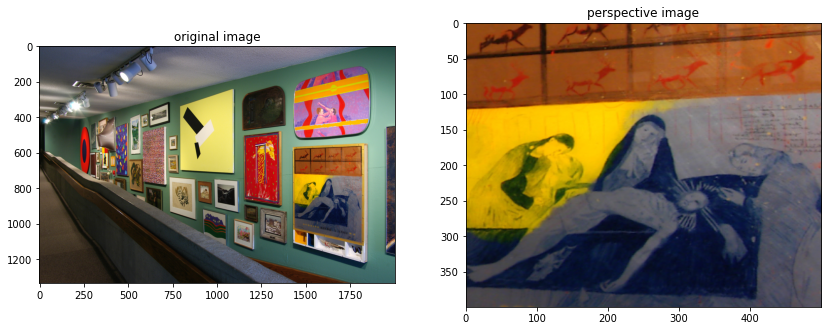

In [23]:
import numpy as np
import cv2

imgBGR = cv2.imread("Gallery.bmp", cv2.IMREAD_COLOR)
img1 = imgBGR[:,:,::-1]
nr, nc = img1.shape[:2]
#------------------- Code Here -------------------#  
pts1 = np.float32( [ [ 1450, 600 ], [ 1450, 1100 ], [ 1900, 1150 ], [ 1900, 650 ] ] )
pts2 = np.float32( [ [ 0, 0 ], [ 0, 500 ], [ 650, 500 ], [ 650, 0 ] ] )
#------------------- Code Here -------------------#  
T = cv2.getPerspectiveTransform( pts1, pts2 )
img2 = cv2.warpPerspective( img1, T, ( 500, 400 ) )
cv2.imwrite( "Gallery_perspec.bmp", img2 )
plt.figure(figsize=(14, 14))
plt.subplot(1,2,1)   
plt.title('original image') 
plt.imshow(img1,cmap=plt.cm.jet)
plt.subplot(1,2,2)   
plt.title('perspective image') 
plt.imshow(img2,cmap=plt.cm.jet)